In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.30


In [3]:
def build(robot):
    box1=Box(robot,3,4.5,name='right')  # location given, width=height=1.0 default
    box2=Box(robot,3,6.5,name='left')
    
    connect(box1,box2,'weld')

    disk1=Disk(robot,2,5.5,name='center')  # radius = 0.5 default
    
    connect(disk1,box1,'distance')
    connect(disk1,box2,'distance')
    
    

In [4]:
def act(t,robot):
    
    distance=robot['center'].read_distance()
    if distance>10:
        robot['left'].F=0.4
        robot['right'].F=0.4
    else:
        robot['left'].F=-0.4
        robot['right'].F=-0.4
    

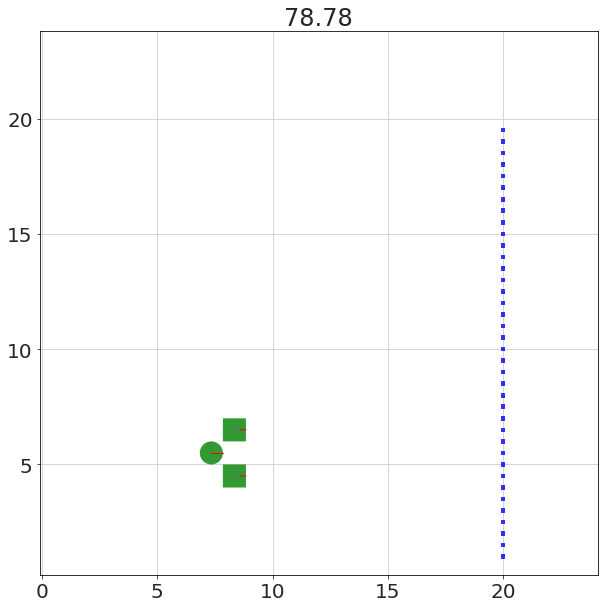

In [10]:
env=Environment(24,24)  # size of the environment
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,20,y,width=0.2,height=0.2,density=0.01)

run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
       )

## Do this then that

In [5]:
def act1(t,robot):
    robot.message="here 1 ",t
    
    if t>5:
        return True
    
def act2(t,robot):
    robot.message="here 2",t

    if t>5:
        return True
    
    
def act3(t,robot):
    robot.message="here 3",t
    
    if t>5:
        return True
    

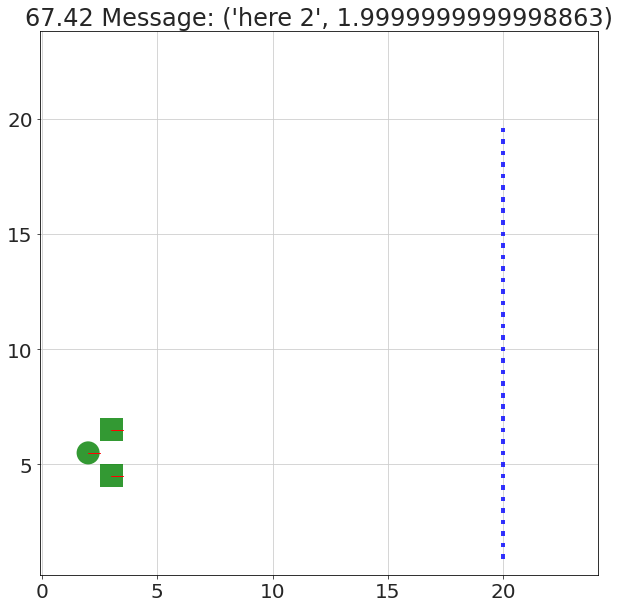

In [6]:
env=Environment(24,24)  # size of the environment
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,20,y,width=0.2,height=0.2,density=0.01)

run_sim(env,[act1,act2,act3],
        total_time=80,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
       )

In [7]:
def forward(t,robot):
    robot['left'].F=0.4
    robot['right'].F=0.4
    return True

In [8]:
def backward(t,robot):
    robot['left'].F=-0.4
    robot['right'].F=-0.4
    return True

In [9]:
def until_close(t,robot):
    distance=robot['center'].read_distance()
    if distance<10:
        return True

In [10]:
def until_far(t,robot):
    distance=robot['center'].read_distance()
    if distance>10:
        return True

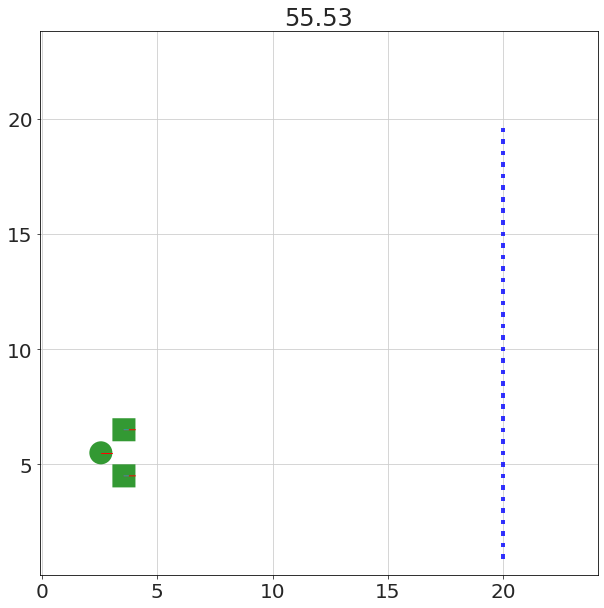

In [11]:
env=Environment(24,24)  # size of the environment
robot=Robot(env)

robot=build(robot)

# put a bunch of blocks
for y in arange(1,20,0.5):
    Box(env,20,y,width=0.2,height=0.2,density=0.01)

run_sim(env,[forward,until_close,backward,until_far],
        total_time=80,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
       )

## Finite State Machine